In [1]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

In [3]:
import scipy.stats
import analysis
from matplotlib import pyplot
from matplotlib import colors
from collections import Counter
import itertools
import string
import random

In [4]:
data = analysis.get_full_dict()

In [5]:
correlations = {}
top_pvals = []

any = next(iter(data.keys()))
questions = list(data[any].keys())

for i in range(len(questions)):
    row = questions[i]
    x = analysis.pull_data(data, data.keys(), row)
    
    if not all(isinstance(v, (int, float)) for v in x):
        print(row)
        continue
        
    for j in range(i):
        col = questions[j]
        y = analysis.pull_data(data, data.keys(), col)
        
        if not all(isinstance(v, (int, float)) for v in y):
            continue
        
        correlations[(row, col)] = scipy.stats.pearsonr(x, y)
        top_pvals.append((row, col) + correlations[(row, col)])
        
top_pvals.sort(key=lambda x: x[3])

Education Rating (Exit)
Gender
Usability Rating (Entry)
Usability Rating (Exit)
Primary Operating System
Efficiency Rating (Entry)
Intention Rating (Exit)
Major
Age
Knowledge Rating (Entry)
Education


In [6]:
set([t[1] for t in top_pvals])

{'I feel comfortable using the shell.',
 'I feel that I have sufficient knowledge of the shell for what I need.',
 'I feel that learning how to use new commands is easy.',
 'I find the interface of the system inviting and usable.',
 'I prefer command line tools to GUI tools.',
 'I think I would prefer the shell if I understood it better (or already do).',
 'I think the command line is easy to use.',
 'I think the command line is more usable than a GUI.',
 'I think the shell is easy to learn.',
 'I use a wide array of commands.',
 'I use control structures in the shell.',
 'I use piping and redirection.',
 'I use wild cards in the shell.',
 'I would prefer this to the normal shell experience',
 'I would suggest this system to others.',
 'I would use this system in the future.',
 'This system is more usable than a traditional shell.',
 'This system would help me perform automations that I would not make on my own.',
 'This system would help me solve problems in the shell.',
 'This system

In [7]:
summary = {}
rename = zip(('usability', 'efficiency', 'knowledge'), ('familiarity', 'proficiency', 'confidence'))
questions = []

for k, l in rename:
    questions += analysis.qs_entry[k]
    mat = [analysis.pull_data(data, data.keys(), q) for q in analysis.qs_entry[k][:1]]
    summary[l] = list(map(lambda x: sum(x) / len(mat), zip(*mat)))

for k in ('usability', 'education', 'intention'):
    questions += analysis.qs_exit[k]
    mat = [analysis.pull_data(data, data.keys(), q) for q in analysis.qs_exit[k][:1]]
    summary[k] = list(map(lambda x: sum(x) / len(mat), zip(*mat)))

In [8]:
matrix = []
labels = ('familiarity', 'proficiency', 'confidence', 'usability', 'education', 'intention')

for i, row in enumerate(questions):
    x = analysis.pull_data(data, data.keys(), row)
    matrix.append([])
    for col in labels:
        y = summary[col] # analysis.pull_data(data, data.keys(), col)
        matrix[i].append(scipy.stats.pearsonr(x, y))

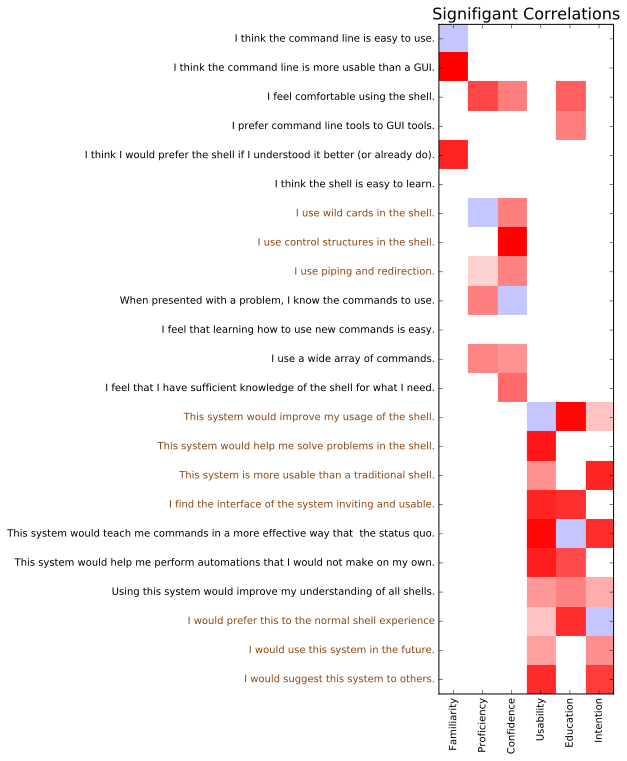

In [9]:
my_cmap = colors.LinearSegmentedColormap(
    'Custom',
    {
        'red':   ((0.0, 1.0, 1.0),
                  (0.4, 1.0, 1.0),
                  (0.8, 0.0, 0.0),
                  (1.0, 1.0, 1.0)),

        'green': ((0.0, 0.0, 0.0),
                  (0.4, 1.0, 1.0),
                  (0.8, 0.0, 0.0),
                  (1.0, 1.0, 1.0)),

        'blue':  ((0.0, 0.0, 0.0),
                  (0.4, 1.0, 1.0),
                  (0.8, 1.0, 1.0),
                  (1.0, 1.0, 1.0))
    }
)

fig, ax = pyplot.subplots(figsize=[12,12])
image = [[(1 + x[0]) / 2.5 if x[1] < 0.05 else 1.0 for x in row] for row in matrix]
ax.imshow(image, cmap=my_cmap, interpolation='nearest')
pyplot.title("Signifigant Correlations", fontsize=16)
pyplot.xticks(range(len(labels)), [s.title() for s in labels], rotation='vertical')
pyplot.yticks(range(len(questions)), questions)

tick_colors = {
    'Usability Rating (Entry)': 'k',
    'Efficiency Rating (Entry)': 'saddlebrown',
    'Knowledge Rating (Entry)': 'k',
    'Usability Rating (Exit)': 'saddlebrown',
    'Education Rating (Exit)': 'k',
    'Intention Rating (Exit)': 'saddlebrown'
}

# for t in ax.xaxis.get_ticklabels():
#     for c in tick_colors:
#         if (t.get_text() in analysis.categories[c]):
#             t.set_color(tick_colors[c])
            
for t in ax.yaxis.get_ticklabels():
    for c in tick_colors:
        if (t.get_text() in analysis.categories[c]):
            t.set_color(tick_colors[c])
            
# ax.grid(True)
# pyplot.tight_layout()

# pyplot.savefig("out/sig.png", transparent=True)

#fig, ax = pyplot.subplots()
#image = [[1 - 20 * x[1] if x[1] < 0.05 else 0 for x in row] for row in matrix]
#ax.imshow(image, cmap=pyplot.cm.Blues, interpolation='nearest')
#pyplot.title("Signifigant P-Values", fontsize=16)

In [ ]:
#analysis.main()

In [ ]:
table = analysis.get_full_dict()
people = analysis.pull_users(table, "Age", lambda x: True)

fig, ax = pyplot.subplots(figsize=[15, 8])
pyplot.title("All Responses")

data = []
reverse_keys = keys[::-1]

for k in reverse_keys:
    data.append(analysis.pull_data(table, people, k))

plt = pyplot.boxplot(data,
                     vert=False,
                     patch_artist=True,
                     showmeans=True) # , notch=True)

xlabels = ['Disagree [1]', '[2]', '[3]', 'Agree [4]']
pyplot.xticks(range(1, len(xlabels) + 1), xlabels)
pyplot.yticks(range(1, len(keys) + 1), reverse_keys)
pyplot.xlim([0.9, 4.1])

for t in ax.yaxis.get_ticklabels():
    for c in tick_colors:
        if (t.get_text() in analysis.categories[c]):
            t.set_color(tick_colors[c])
            
color_loop = itertools.cycle(['lightcoral', 'powderblue', 'lightsage', 'moccasin', 'honeydew'])

for p in plt['boxes']:
    pyplot.setp(p, color=next(color_loop))
    
pyplot.tight_layout()
pyplot.savefig("out/all.png", transparent=True)

In [ ]:
data = analysis.get_full_dict()

matrix = []
ykeys = []
xkeys = []

for k in ('usability', 'efficiency', 'knowledge'):
    ykeys += analysis.qs_entry[k]
    xkeys.append( (k, analysis.qs_entry[k]) )
    
for k in ('usability', 'education', 'intention'):
    ykeys += analysis.qs_exit[k]
    xkeys.append( (k, analysis.qs_exit[k]) )
    
for i, row in enumerate(ykeys):
    ydat = analysis.pull_data(data, data.keys(), ykeys[i])
    matrix.append([])
    for j, col in enumerate(xkeys):
        xdat = []
        for k in xkeys[j][1]:
            xdat.append(analysis.pull_data(data, data.keys(), k))
        xdat = list(map(lambda x: sum(x) / len(xdat), zip(*xdat)))
        matrix[i].append(scipy.stats.pearsonr(ydat, xdat))
        
xkeys = [k[0] for k in xkeys]

fig, ax = pyplot.subplots(figsize=[12,12])
image = [[(1 + x[0]) / 2.5 if x[1] < 0.05 else 1.0 for x in row] for row in matrix]
ax.imshow(image, cmap=my_cmap, interpolation='nearest')
pyplot.title("Signifigant Correlations", fontsize=16)
#ax.xaxis.tick_top()
pyplot.xticks(range(len(xkeys)), ['{}...'.format(' '.join(s.split()[:2])) for s in xkeys], rotation='vertical')
pyplot.yticks(range(len(ykeys)), ykeys)
#pyplot.setp(pyplot.xticks()[1], rotation=270)

for t in ax.xaxis.get_ticklabels():
    for c in tick_colors:
        if (t.get_text() in analysis.categories[c]):
            t.set_color(tick_colors[c])
            
for t in ax.yaxis.get_ticklabels():
    for c in tick_colors:
        if (t.get_text() in analysis.categories[c]):
            t.set_color(tick_colors[c])
            
ax.grid(True)
pyplot.tight_layout()

pyplot.savefig("out/sig_alt.png", transparent=True)

In [ ]:
for cat in analysis.categories:
    data = []
    for key in analysis.categories[cat]:
        data += analysis.pull_data(table, people, key)
    print(cat + ": " + str(sum(data)/len(data)))

In [ ]:
keys = analysis.qs_entry['qualitative'] + analysis.qs_exit['qualitative']
entry_list, exit_list = analysis.read_data()
qual_dict = analysis.organize_data(entry_list, exit_list)[4]
users = [k for k in qual_dict]
data = {key: analysis.pull_data(qual_dict, users, key) for key in keys}

In [ ]:
data['What do you think needs the most improvements?']

In [ ]:
punctuation = set(string.punctuation)

any = next(iter(qual_dict.keys()))
counter = Counter()
words = []

for k in qual_dict[any].keys():
    for s in data[k]:
        sanitized = ''.join(ch.lower() for ch in s if ch not in punctuation)
        words += sanitized.split()

counter.update(words)    
list(itertools.takewhile(lambda x: x[1] > 3, counter.most_common()))

In [ ]:
markov = {}

for i in range(1, len(words)):
    if words[i-1] in markov:
        markov[words[i-1]].append(words[i])
    else:
        markov[words[i-1]] = [words[i]]
        
s = [random.choice(list(markov.keys()))]

while len(s) < 100 and s[-1] in markov:
    s.append(random.choice(markov[s[-1]]))

print(s)